In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import time

In [2]:
def exact_solution(x,t, alpha):
    f = (np.exp(-4*np.pi**2*alpha*t) * np.sin(2*np.pi*x)
      + 2.0*(1-np.exp(-np.pi**2*alpha*t)) * np.sin(np.pi*x)
      / (np.pi**2*alpha))

    return f

In [3]:
def solve(T0, rhs_centered, dt, dx, alpha, source, euler_step):
    for i in range(nt):
        T = euler_step(T0, rhs_centered, dt, dx, alpha, source)
        T0 = T.copy()
    return T

In [4]:
# Physical parameters
alpha = 0.1                     # Heat transfer coefficient
lx = 1.                         # Size of computational domain

# Grid parameters
nx = 100                         # number of grid points
dx = lx / (nx-1)                # grid spacing
x = np.linspace(0., lx, nx)     # coordinates of grid points

# Time parameters
ti = 0.                         # initial time
tf = 2.                         # final time
fourier = 0.49                  # Fourier number
dt = fourier*dx**2/alpha        # time step
nt = int((tf-ti) / dt)          # number of time steps

# Initial condition
T0 = np.sin(2*np.pi*x)          # initial condition
source = 2*np.sin(np.pi*x)      # heat source term


def rhs_centered(T, dx, alpha, source):
    nx = T.shape[0]
    f = np.empty(nx)

    f[1:-1] = alpha/dx**2 * (T[:-2] - 2*T[1:-1] + T[2:]) + source[1:-1]
    f[0] = 0.
    f[-1] = 0.

    return f


def euler_step(u, f, dt, *args):
    unp1 = u + dt * f(u, *args)
    return unp1

In [11]:
Time_numba = np.array([])
Time = np.array([])

for N_t in [10,100,500, 1000, 2000]:
  nx = N_t                         # number of grid points
  dx = lx / (nx-1)                # grid spacing
  x = np.linspace(0., lx, nx)     # coordinates of grid points

# Time parameters
  ti = 0.                         # initial time
  tf = 2.                         # final time
  cond = 0.49                  # condition number
  dt = cond*dx**2/alpha        # time step
  nt = int((tf-ti) / dt)          # number of time steps

# Initial condition
  T0 = np.sin(2*np.pi*x)
  source = 2*np.sin(np.pi*x)

  solve_numba = jit(nopython=True)(solve)         # numba version of the function 'solve'
  euler_step_numba = jit(nopython=True)(euler_step)          # numba version of the function 'euler_step'
  rhs_centered_numba = jit(nopython=True)(rhs_centered)         # numba version of the function 'rhs_centered'

  time = %timeit -o -r 2 solve(T0, rhs_centered, dt, dx, alpha, source, euler_step)
  time_numba = %timeit -o -r 2 solve_numba(T0, rhs_centered_numba, dt, dx, alpha, source, euler_step_numba)
  Time = np.append(Time, time.average)
  Time_numba = np.append(Time_numba, time_numba.average)

334 µs ± 5 µs per loop (mean ± std. dev. of 2 runs, 1000 loops each)
94.6 µs ± 56.4 µs per loop (mean ± std. dev. of 2 runs, 1 loop each)
44.2 ms ± 135 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)
2.2 ms ± 40.9 µs per loop (mean ± std. dev. of 2 runs, 1 loop each)
1.95 s ± 453 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)
187 ms ± 274 µs per loop (mean ± std. dev. of 2 runs, 1 loop each)
6.78 s ± 790 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)
1.7 s ± 405 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)
33.2 s ± 1.66 s per loop (mean ± std. dev. of 2 runs, 1 loop each)
11.7 s ± 4.47 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


Text(0.5, 1.0, 'Comparison of numba and numpy algorithms.')

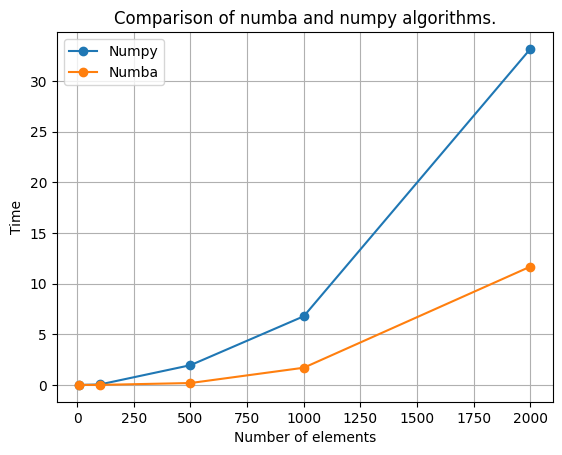

In [13]:
plt.plot([10,100,500, 1000, 2000], Time, '-o', label='Numpy')
plt.plot([10,100,500, 1000, 2000], Time_numba, '-o', label='Numba')
plt.legend()
plt.xlabel('Number of elements')
plt.ylabel('Time')
plt.grid()
plt.title('Comparison of numba and numpy algorithms.')

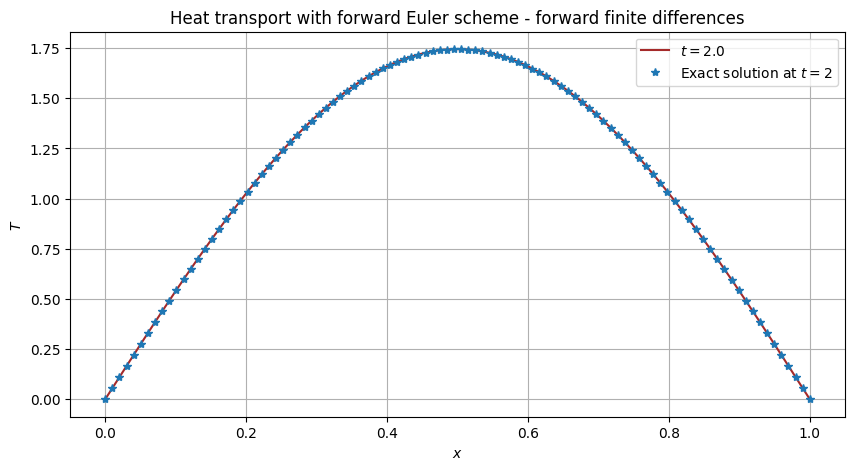

In [ ]:
# T = solve(T0, rhs_centered, dt, dx, alpha, source, euler_step)

# plot the solution at several times
fig, ax = plt.subplots(figsize=(10, 5))

# ax.plot(x, T[0], label='Initial condition')
# ax.plot(x, T[int(0.5/dt)], color='green', label='$t=0.5$')
ax.plot(x, T, color='brown', label=f'$t={tf}$')
ax.plot(x, exact_solution(x, 2.0, alpha), '*', label='Exact solution at $t=2$')


ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Heat transport with forward Euler scheme'
             ' - forward finite differences')
ax.legend();
plt.grid()
plt.savefig('result.png', dpi = 200, format = 'png')